# POGEMA basics


In [ ]:
# @title Installation (it is recommended to use GPU accelerated environment):
!pip3 install pogema pogema-toolbox cppimport sample_factory -q
!git clone -q https://github.com/CognitiveAISystems/learn-to-follow.git learn_to_follow
!git clone -q https://github.com/CognitiveAISystems/MAPF-GPT
!ln -s -r learn_to_follow/{follower*,env,model,utils} /content/
!ln -s -r MAPF-GPT/{gpt,tokenizer} /content/
!git clone https://github.com/Kei18/pypibt

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 kB 10.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/7

First, we will run a random policy in the POGEMA environment:

In [ ]:
from pogema import pogema_v0, GridConfig, AnimationMonitor, AnimationConfig

# Define random configuration
grid_config = GridConfig(num_agents=4,  # number of agents
                         size=8, # size of the grid
                         density=0.4,  # obstacle density
                         seed=1,  # set to None for random
                                  # obstacles, agents and targets
                                  # positions at each reset
                         max_episode_steps=128,  # horizon
                         obs_radius=3,  # defines field of view
                         )

env = pogema_v0(grid_config=grid_config)
env = AnimationMonitor(env) # wrapping environment with monitor for saving svg's

obs, info = env.reset()

terminated = truncated = [False, ...]

while not all(terminated) and not all(truncated):
    # Use random policy to make actions
    actions = [env.action_space.sample() for _ in range(grid_config.num_agents)]
    obs, reward, terminated, truncated, info = env.step(actions)
info

[{'is_active': False,
  'metrics': {'ISR': 0.5, 'CSR': 0.0, 'ep_length': 108.75}},
 {'is_active': False},
 {'is_active': True},
 {'is_active': True}]

## Terminal Rendering


In [ ]:
env.render()

 .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 .  .                                .  . 
 .  .     2     .     .  .     .     .  . 
 .  .     .  .     .  3     .  .     .  . 
 .  .     .  .  .  .    |2| .        .  . 
 .  .           .  .  .     .  .     .  . 
 .  .                 .  .  . |3|    .  . 
 .  .           .  .     .  .        .  . 
 .  .     .           .     .  .     .  . 
 .  .              .  .  .           .  . 
 .  .                                .  . 
 .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  .  .  .  .  .  .  . 


## Default Animation

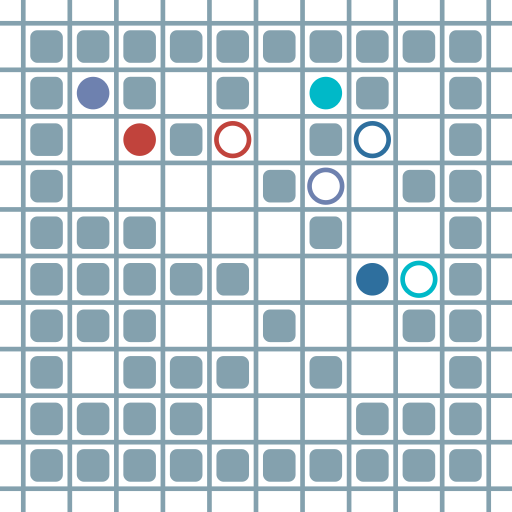

In [ ]:
from IPython.display import SVG, display

# saving animation
env.save_animation("render.svg")

# displaying it
display(SVG('render.svg'))

## Egocentric Animation

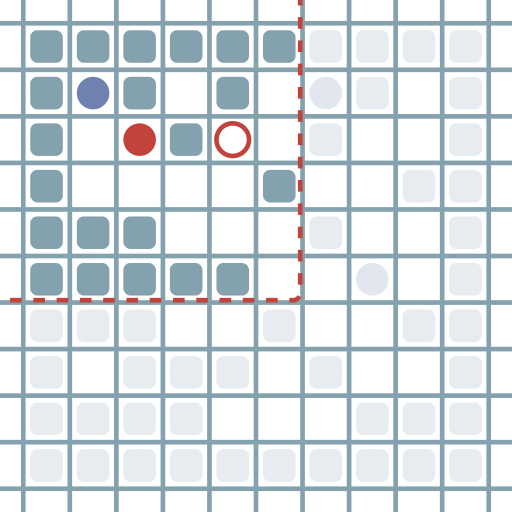

In [ ]:
from IPython.display import SVG, display
env.save_animation("render.svg", AnimationConfig(egocentric_idx=0))
display(SVG('render.svg'))

## Static Map

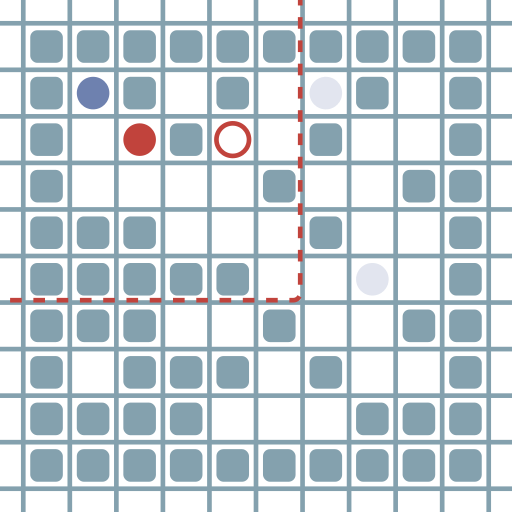

In [ ]:
from IPython.display import SVG, display
env.save_animation("render.svg", AnimationConfig(egocentric_idx=0, static=True))
display(SVG('render.svg'))

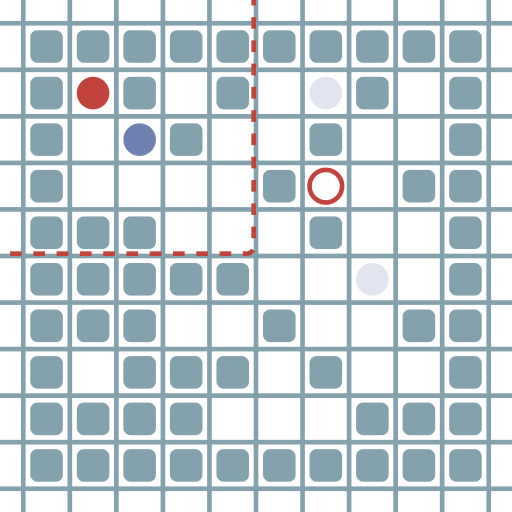

In [ ]:
from IPython.display import SVG, display
env.save_animation("render.svg", AnimationConfig(egocentric_idx=2, static=True))
display(SVG('render.svg'))

## Obstacles Only Render

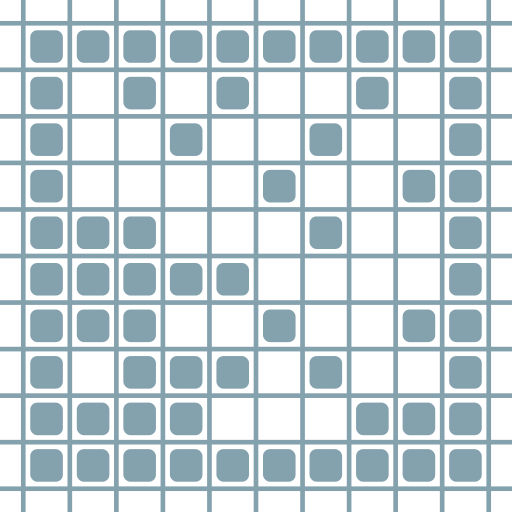

In [ ]:
from IPython.display import SVG, display
env.save_animation("render.svg", AnimationConfig(static=True, show_agents=False))
display(SVG('render.svg'))

## Accessing the full state of Environment

You can use observation_type='MAPF', which provides additional keys in observation: 'global_obstacles', 'global_xy', 'global_target_xy'

In [ ]:
from pogema import pogema_v0, GridConfig, AnimationMonitor, AnimationConfig

grid_config = GridConfig(num_agents=2, observation_type='MAPF')

env = pogema_v0(grid_config=grid_config)
env = AnimationMonitor(env)

obs, info = env.reset()

print(obs[0].keys())

dict_keys(['obstacles', 'agents', 'xy', 'target_xy', 'global_obstacles', 'global_xy', 'global_target_xy'])


# Examples of Algorithms

## Running A*

`BatchAStarAgent`: Handles multiple agents by maintaining a set of `AStarAgent` instances. For each agent, it computes actions in parallel based on their individual observations. The `reset_states` method resets the states of all agents for a new episode.

Each agent uses the A* algorithm to plan its path in the environment. It takes observations, updates its memory of the grid, computes the next step, and chooses the corresponding action. If the agent is blocked by other agents, it will either execute a random action.



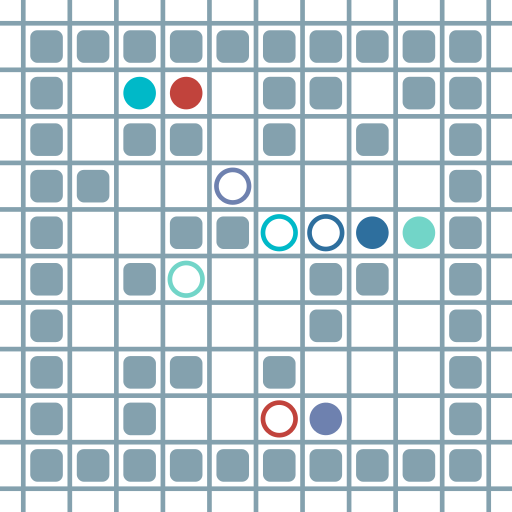

In [ ]:
from pogema import BatchAStarAgent
from pogema_toolbox.run_episode import run_episode

env = pogema_v0(grid_config=GridConfig(num_agents=5, size=8, obs_radius=5,
                                        observation_type='MAPF', on_target='nothing',
                                        collision_system='soft', seed=0))
env = AnimationMonitor(env)
agent = BatchAStarAgent()

agent.reset_states() # resetting states of algorithm between episodes
obs, _ = env.reset() # resetting environment

terminated = truncated = [False, ...]

while not all(terminated) and not all(truncated):
    actions = agent.act(obs)
    obs, reward, terminated, truncated, info = env.step(actions)

env.save_animation("render.svg")
display(SVG('render.svg'))

This loop can be simplified using `run_episode` boilerplate:

In [ ]:
run_episode(env, agent)

{'ISR': 0.6, 'CSR': 0.0, 'ep_length': 63, 'SoC': 146, 'makespan': 64}

## Running MAPF-GPT


MAPF-GPT, a deep learning-based model for solving MAPF problems. Trained with imitation learning on trajectories produced by LaCAM, it samples actions under partial observability without heuristics or agent communication.

There are three types of MAPF-GPT models, based on the number of parameters: 2M, 6M, and 85M. All the weights will be automatically downloaded using HuggingFace. By default 6M model is used.





INFO:root:running build_ext
INFO:root:building 'tokenizer.cost2go' extension
INFO:root:creating /tmp/tmp8o2euxsd/content
INFO:root:creating /tmp/tmp8o2euxsd/content/tokenizer
INFO:root:x86_64-linux-gnu-gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/lib/python3.10/dist-packages/pybind11/include -I/usr/local/lib/python3.10/dist-packages/pybind11/include -I/content/tokenizer -I/usr/include/python3.10 -c /content/tokenizer/.rendered.cost2go.cpp -o /tmp/tmp8o2euxsd/content/tokenizer/.rendered.cost2go.o -std=c++11 -fvisibility=hidden -std=c++17
INFO:root:creating /tmp/tmp8o2euxsd/tokenizer
INFO:root:x86_64-linux-gnu-g++ -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -g -fwrapv -O2 /tmp/tmp8o2euxsd/content/tokenizer/.rendered.cost2go.o -L/usr/lib/x86_64-linux-gnu -o /tmp/tmp8o2euxsd/tokenizer/cost2go.cpython-310-x86_64-linux-gnu.so
INFO:root:copying /tmp/tmp8o

model-6M.pt:   0%|          | 0.00/76.6M [00:00<?, ?B/s]

2024-10-14 at 07:56:22 | Toolbox INFO | Using weights loaded from huggingface: weights/model-6M.pt
/content/gpt/inference.py:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


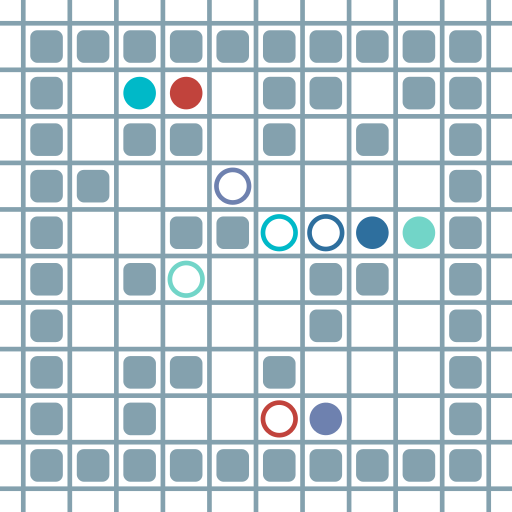

In [ ]:
from gpt.inference import MAPFGPTInference, MAPFGPTInferenceConfig

mapf_gpt_agent = MAPFGPTInference(MAPFGPTInferenceConfig())
run_episode(env, mapf_gpt_agent)

env.save_animation("render.svg")
display(SVG('render.svg'))

## Running Follower

Follower addresses the challenging problem of decentralized lifelong multi-agent pathfinding. The proposed approach utilizes a combination of a planning algorithm to construct a long-term plan and reinforcement learning to resolve local conflicts.

The Follower's weights are already included in the repository.​

INFO:cppimport.checksum:Failed to find compiled extension; rebuilding.
INFO:root:running build_ext
INFO:root:building 'follower_cpp.planner' extension
INFO:root:creating /tmp/tmp_pr_37jr/content
INFO:root:creating /tmp/tmp_pr_37jr/content/follower_cpp
INFO:root:x86_64-linux-gnu-gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/lib/python3.10/dist-packages/pybind11/include -I/usr/local/lib/python3.10/dist-packages/pybind11/include -I/content/follower_cpp -I/usr/include/python3.10 -c /content/follower_cpp/.rendered.planner.cpp -o /tmp/tmp_pr_37jr/content/follower_cpp/.rendered.planner.o -std=c++11 -fvisibility=hidden -std=c++17
INFO:root:creating /tmp/tmp_pr_37jr/follower_cpp
INFO:root:x86_64-linux-gnu-g++ -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -g -fwrapv -O2 /tmp/tmp_pr_37jr/content/follower_cpp/.rendered.planner.o -L/usr/lib/x86_64-linux-gnu -o /tm

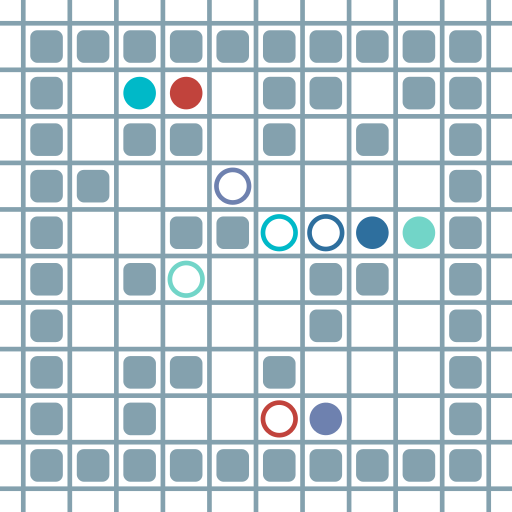

In [ ]:
from follower.inference import FollowerInferenceConfig, FollowerInference
from follower.preprocessing import follower_preprocessor
from pogema_toolbox.create_env import create_env_base, Environment

cfg = Environment(num_agents=5, size=8, obs_radius=5,
                  observation_type='MAPF', on_target='restart',
                  collision_system='soft', seed=0)

follower_env = AnimationMonitor(create_env_base(cfg))
follower_cfg = FollowerInferenceConfig()
follower_agent = FollowerInference(follower_cfg)

run_episode(follower_preprocessor(follower_env, follower_cfg), follower_agent)

follower_env.save_animation("render.svg")
display(SVG('render.svg'))

# Integrating an Algorithm with POGEMA

Here we show how you can integrate any classical or learning-based algorithm with POGEMA and evaluation mechanism. As an example we chose basic python implementation of PIBT approach - very fast rule-based planner. The details about it can be found at [AIJ paper](https://doi.org/10.1016/j.artint.2022.103752)

1. You need a config, that might be used to control the parameters of the approach. At the very least it should have the name of the approach.
2. You need a class with two methods: **act** and **reset_states**.
  - **act** is the method that implements main loop of the approach. It's called on every step. It gets observations for each of the agents. As an output it should provide a list of actions.
  - **reset_states** is required to reset the inner state of the approach before inferencing the next instance (the next episode of POGEMA).


Here is the basic implementation of the required class that allows to integrate PIBT with POGEMA.

In [ ]:
from typing import Literal
import numpy as np
from pogema import GridConfig
from pogema_toolbox.algorithm_config import AlgoBase
from pypibt.pypibt.pibt import PIBT


class PIBTInferenceConfig(AlgoBase):
    name: Literal['PIBT'] = 'PIBT'


class PIBTInference:
    def __init__(self, cfg: PIBTInferenceConfig):
        self.cfg = cfg
        self.actions = {tuple(coord): i for i, coord in enumerate(GridConfig().MOVES)}
        self.agent = None
        self.configs = []
        self.timestep = 0

    def act(self, observations, rewards=None, dones=None, info=None, skip_agents=None):
        num_agents = len(observations)
        if self.timestep == 0:
            global_xy = [obs['global_xy'] for obs in observations]
            global_target_xy = [obs['global_target_xy'] for obs in observations]
            grid = np.array(observations[0]['global_obstacles']).astype(np.bool_)
            grid = np.logical_not(grid)
            self.agent = PIBT(grid, global_xy, global_target_xy)
            self.configs = self.agent.run()

        if self.timestep + 1 >= len(self.configs):
            return [0 for _ in range(num_agents)]
        cur_config = self.configs[self.timestep]
        next_config = self.configs[self.timestep + 1]
        self.timestep += 1
        actions = [self.actions[(next_config[i][0] - cur_config[i][0],
                                 next_config[i][1] - cur_config[i][1])]
                   for i in range(num_agents)]
        return actions

    def reset_states(self):
        self.agent = None
        self.configs = 0
        self.timestep = 0

Now we can run some instance and get an animation to ensure that everything works as intented.

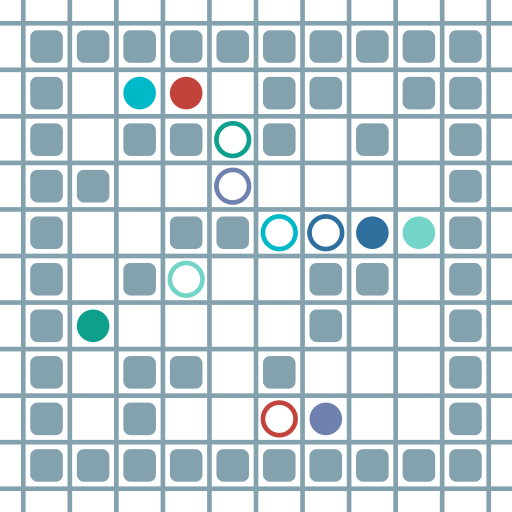

In [ ]:
env = pogema_v0(grid_config=GridConfig(num_agents=6, size=8, obs_radius=2,
                                       observation_type='MAPF', on_target='nothing',
                                       collision_system='soft', seed=0))
env = AnimationMonitor(env)
agent = PIBTInference(PIBTInferenceConfig())

run_episode(env, agent)

env.save_animation("render.svg")
display(SVG('render.svg'))

# Testing Algorithms with POGEMA Toolbox

Google Colab applies several callbacks that cannot be simply serialized for parallel execution. Thus, we will use the `sequential` backend. For local machines, it's recommended to use `balanced_dask`.

We will run simple A* algorithm, which will use random actions in case, if it cannot find the path, blocked by other agents. For example of algorithms, which has tunable hyperparameters please refer to PogemaToolbox  [example of Follower](https://github.com/CognitiveAISystems/learn-to-follow/blob/main/eval.py).


Let's save the configuration in the `eval-example` folder. We will use a text block for visibility in Google Colab, but this config is usually a YAML file, which is easy to modify.

`pogema-toolbox` provides a unified way of conducting distributed testing using [Dask](https://github.com/dask/dask) and defined configurations.  The configuration is split into three main sections; the first one details the parameters of the POGEMA environment used for testing. The unified `grid_search` tag allows for the examination of any existing parameter of the environment.

The second part of the configurations is a list of algorithms to be tested. Each algorithm has its alias (which will be shown in the results) and name, which specifies the family of methods. It also includes a list of hyperparameters common to different approaches, e.g., number of processes, parallel backend, etc., and the specific parameters of the algorithm.

The third functionality and third part of the configuration concern views. This is a form of presenting the results of the algorithms. Working with complex testing often requires custom tools for creating visual materials such as plots and tables. The POGEMA toolbox provides such functionality for MAPF tasks out-of-the-box.


In [ ]:
config_example = """
environment:
  name: Pogema-v0
  observation_type: MAPF
  on_target: restart
  max_episode_steps: 256
  map_name: warehouse
  num_agents:
    grid_search: [ 8, 16]
  seed:
    grid_search: [ 0, 1, 2]
  with_animation: True

algorithms:
  A-star:
    name: A*
    parallel_backend: sequential
  MAPF-GPT-2M:
    name: MAPF-GPT
    path_to_weights: weights/model-2M.pt
    parallel_backend: sequential
  Follower:
    name: Follower
    #path_to_weights: weights/model-6M.pt
    parallel_backend: sequential

results_views:
  ExampleTabularView:
    type: tabular
    drop_keys: [ seed, map_name ]
    print_results: True

  ExamplePlot:
    type: plot
    x: num_agents
    y: avg_throughput
"""

from pathlib import Path
import yaml

eval_dir = Path('config-example')
config_path = eval_dir / 'config-example.yaml'
eval_dir.mkdir(parents=True, exist_ok=True)

with open(config_path, 'w') as f:
    f.write(config_example)

Now we run our evaluation script, which will produce the results table. The raw data will be stored in the evaluation folder for later access.

In [ ]:
from pogema_toolbox.evaluator import evaluation
from pogema import BatchAStarAgent

from pathlib import Path

import yaml

from pogema_toolbox.create_env import create_env_base, Environment
from pogema_toolbox.registry import ToolboxRegistry

ToolboxRegistry.setup_logger(level='INFO')
ToolboxRegistry.register_env('Pogema-v0', create_env_base, Environment)
ToolboxRegistry.register_algorithm('A*', BatchAStarAgent)

In [ ]:
with open(config_path) as f:
    evaluation_config = yaml.safe_load(f)

results = evaluation(evaluation_config, eval_dir=eval_dir)

2024-10-14 at 08:19:29 | Toolbox INFO | Starting: A-star, {'name': 'A*', 'parallel_backend': 'sequential'}
2024-10-14 at 08:19:29 | Toolbox INFO | Running: A-star [1/6]
2024-10-14 at 08:19:30 | Toolbox INFO | Running: A-star [2/6]
2024-10-14 at 08:19:30 | Toolbox INFO | Running: A-star [3/6]
2024-10-14 at 08:19:31 | Toolbox INFO | Running: A-star [4/6]
2024-10-14 at 08:19:32 | Toolbox INFO | Running: A-star [5/6]
2024-10-14 at 08:19:35 | Toolbox INFO | Running: A-star [6/6]
2024-10-14 at 08:19:37 | Toolbox SUCCESS | Finished: A-star, runtime: 7.91230634700014
2024-10-14 at 08:19:37 | Toolbox INFO | Starting: MAPF-GPT-2M, {'name': 'MAPF-GPT', 'path_to_weights': 'weights/model-2M.pt', 'parallel_backend': 'sequential'}
2024-10-14 at 08:19:37 | Toolbox INFO | Using weights loaded from huggingface: weights/model-2M.pt
/content/gpt/inference.py:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly.

Let's go over the raw data. The results are a list where each item corresponds to the results of a single testing episode. Each item provides the algorithm, metrics, and `env_grid_search` information, such as:

```json
[
    {
        "algorithm": "A-star",
        "metrics": {"avg_throughput": 0.23828125},
        "env_grid_search": {"map_name": "four-rooms", "num_agents": 8, "seed": 0}
    },
    ...
]​
```

In [ ]:
!head -c 200 config-example/A-star.json

[{"metrics": {"avg_throughput": 0.23828125}, "env_grid_search": {"map_name": "four-rooms", "num_agents": 8, "seed": 0}, "algorithm": "A-star"}, {"metrics": {"avg_throughput": 0.2421875}, "env_grid_sea

## Task 1: Evaluation of MAPF-GPT vs Follower on LifeLong MAPF

We can register Follower and MAPF-GPT this way:​

In [ ]:
from follower.inference import FollowerInference, FollowerInferenceConfig
from follower.preprocessing import follower_preprocessor
from gpt.inference import MAPFGPTInference, MAPFGPTInferenceConfig

ToolboxRegistry.register_algorithm('Follower', FollowerInference, FollowerInferenceConfig, follower_preprocessor)
ToolboxRegistry.register_algorithm("MAPF-GPT", MAPFGPTInference, MAPFGPTInferenceConfig)

So the names of algorithms in config should be Follower and MAPF-GPT.

Also, we can change the MAPF-GPT model size using the `path_to_weights` field, e.g., `path_to_weights: weights/model-2M.pt`. We can even compare several models in one experiment using different aliases:


```yaml
 algorithms:
  MAPF-GPT-2M:
    name: MAPF-GPT
    path_to_weights: weights/model-2M.pt
    parallel_backend: sequential

  MAPF-GPT-6M:
    name: MAPF-GPT
    path_to_weights: weights/model-6M.pt
    parallel_backend: sequential
```

In [ ]:
# Let's compare MAPF-GPT with Follower
# on LifeLong MAPF scenario using four-rooms map

# Your code here!

## Task 2: Changing testing map to Warehouse

To register a custom map in `pogema-toolbox` you can use example below:

In [ ]:
from pogema_toolbox.registry import ToolboxRegistry

# Creating cusom_map
custom_map = """
  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  !@@!@@!$$$$$$$$$$!$$$$$$$$$$!$$$$$$$$$$!@@!@@!
  !@@!@@!##########!##########!##########!@@!@@!
  !@@!@@!$$$$$$$$$$!$$$$$$$$$$!$$$$$$$$$$!@@!@@!
  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  !@@!@@!$$$$$$$$$$!$$$$$$$$$$!$$$$$$$$$$!@@!@@!
  !@@!@@!##########!##########!##########!@@!@@!
  !@@!@@!$$$$$$$$$$!$$$$$$$$$$!$$$$$$$$$$!@@!@@!
  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  !@@!@@!$$$$$$$$$$!$$$$$$$$$$!$$$$$$$$$$!@@!@@!
  !@@!@@!##########!##########!##########!@@!@@!
  !@@!@@!$$$$$$$$$$!$$$$$$$$$$!$$$$$$$$$$!@@!@@!
  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  !@@!@@!$$$$$$$$$$!$$$$$$$$$$!$$$$$$$$$$!@@!@@!
  !@@!@@!##########!##########!##########!@@!@@!
  !@@!@@!$$$$$$$$$$!$$$$$$$$$$!$$$$$$$$$$!@@!@@!
  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  !@@!@@!$$$$$$$$$$!$$$$$$$$$$!$$$$$$$$$$!@@!@@!
  !@@!@@!##########!##########!##########!@@!@@!
  !@@!@@!$$$$$$$$$$!$$$$$$$$$$!$$$$$$$$$$!@@!@@!
  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  !@@!@@!$$$$$$$$$$!$$$$$$$$$$!$$$$$$$$$$!@@!@@!
  !@@!@@!##########!##########!##########!@@!@@!
  !@@!@@!$$$$$$$$$$!$$$$$$$$$$!$$$$$$$$$$!@@!@@!
  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  !@@!@@!$$$$$$$$$$!$$$$$$$$$$!$$$$$$$$$$!@@!@@!
  !@@!@@!##########!##########!##########!@@!@@!
  !@@!@@!$$$$$$$$$$!$$$$$$$$$$!$$$$$$$$$$!@@!@@!
  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  !@@!@@!$$$$$$$$$$!$$$$$$$$$$!$$$$$$$$$$!@@!@@!
  !@@!@@!##########!##########!##########!@@!@@!
  !@@!@@!$$$$$$$$$$!$$$$$$$$$$!$$$$$$$$$$!@@!@@!
  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
"""

# Registring custom_map
ToolboxRegistry.register_maps({"warehouse": custom_map})

After registration, the map will be available in the configuration file.

The Warehouse map can be found at [this link](https://github.com/CognitiveAISystems/MAPF-GPT/blob/main/eval_configs/03-warehouse/maps.yaml). It has a special format that forces agents and targets to appear in restricted positions.

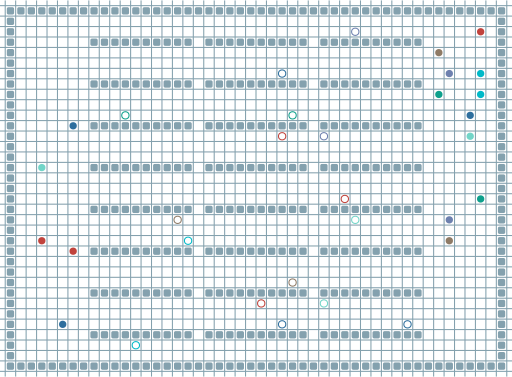

In [ ]:
display(SVG('renders/Follower/pogema-warehouse-seed1.svg'))

# Dataset collecting

Another way of utilizing POGEMA - collecting dataset for offline training or behavior cloning. For this purpose we can modify the logging output to additional log the action history besides the preformance metrics. Action history is the most compact way to represent the behavior of some approach. Further we can build any required observation based on this information.

In [ ]:
from gymnasium import Wrapper

class LogActions(Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.made_actions = None

    def step(self, actions):
        observations, rewards, terminated, truncated, infos = self.env.step(actions)
        for i, action in enumerate(actions):
            self.made_actions[i].append(int(action))
        if all(terminated) or all(truncated):
            infos[0]["metrics"]["made_actions"] = self.made_actions
        return observations, rewards, terminated, truncated, infos

    def reset(self, **kwargs):
        observations, info = self.env.reset(**kwargs)
        self.made_actions = [[] for _ in observations]
        return observations, info

def LoggingEnv(config):
    env = create_env_base(config)
    env = LogActions(env)
    return env

Let's run A* again, but now - with LoggingEnv

In [ ]:
from pogema_toolbox.evaluator import evaluation
from pogema import BatchAStarAgent

from pathlib import Path

import yaml

from pogema_toolbox.create_env import create_env_base, Environment
from pogema_toolbox.registry import ToolboxRegistry

ToolboxRegistry.setup_logger(level='INFO')
ToolboxRegistry.register_env('Pogema-v0', LoggingEnv, Environment) # the only change is in this line
ToolboxRegistry.register_algorithm('A*', BatchAStarAgent)

with open(config_path) as f:
    evaluation_config = yaml.safe_load(f)

results = evaluation(evaluation_config, eval_dir=eval_dir)

2024-10-14 at 08:24:36 | Toolbox WARNING | Registering existing environment with name Pogema-v0
2024-10-14 at 08:24:36 | Toolbox WARNING | Registering existing algorithm with name A*
2024-10-14 at 08:24:36 | Toolbox INFO | Starting: A-star, {'name': 'A*', 'parallel_backend': 'sequential'}
2024-10-14 at 08:24:36 | Toolbox INFO | Running: A-star [1/6]
2024-10-14 at 08:24:37 | Toolbox INFO | Running: A-star [2/6]
2024-10-14 at 08:24:38 | Toolbox INFO | Running: A-star [3/6]
2024-10-14 at 08:24:39 | Toolbox INFO | Running: A-star [4/6]
2024-10-14 at 08:24:41 | Toolbox INFO | Running: A-star [5/6]
2024-10-14 at 08:24:42 | Toolbox INFO | Running: A-star [6/6]
2024-10-14 at 08:24:44 | Toolbox SUCCESS | Finished: A-star, runtime: 7.948733624999932
2024-10-14 at 08:24:44 | Toolbox INFO | Starting: MAPF-GPT-2M, {'name': 'MAPF-GPT', 'path_to_weights': 'weights/model-2M.pt', 'parallel_backend': 'sequential'}
2024-10-14 at 08:24:44 | Toolbox INFO | Using weights loaded from huggingface: weights/mod

Load .json file with logged data to see what we got

In [ ]:
import json

with open('config-example/A-star.json') as f:
    data = json.load(f)

print(data[0]['metrics']['made_actions'][0])

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 3, 3, 3, 4, 4, 4, 2, 2, 2, 2, 3, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 0, 0, 0, 0, 4, 3, 3, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 3, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 4, 3, 2, 2, 3, 3, 2, 2, 4, 1, 2, 4, 3, 2, 3, 4, 2, 0, 1, 2, 4, 2, 3, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 3, 3, 1, 3, 4, 4]


We can reproduce the made actions in POGEMA without need to run any approach and obtain the observations

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


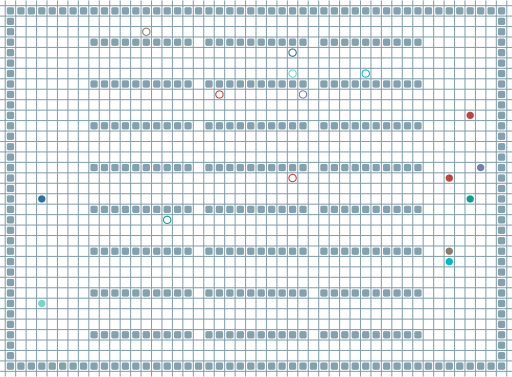

In [ ]:
num_agents = data[0]['env_grid_search']['num_agents']
map_name = 'warehouse'
seed = data[0]['env_grid_search']['seed']
made_actions = data[0]['metrics']['made_actions']
env = create_env_base(Environment(num_agents=num_agents, map_name=map_name,
                                       obs_radius=2, observation_type='POMAPF',
                                       on_target='restart', seed=seed))
env = AnimationMonitor(env)
obs, _ = env.reset()

for i in range(len(made_actions[0])):
    actions = [made_actions[k][i] for k in range(num_agents)]
    obs, _, _, _, _ = env.step(actions)

env.save_animation("render.svg")
display(SVG('render.svg'))